# Cat and Mouse - Hide and Seek (MC's, Probability)

The Cats And Random Mouse Riddle. Simple Problem Solved With Markov Chains

Concepts:
* Absorbing Markov Chain
* Transition Matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
# Import the MarkovChain class from markovchain.py
from markovchains import MarkovChain

N = 7

## Case of "linear" layout with no absorbing hole

Let's look first at how the life of the mouse is without any cat

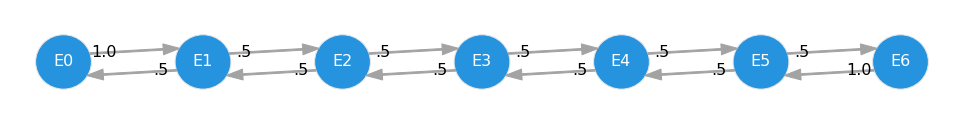

In [2]:
# Transition matrix
M = 1/2*np.array([
    [0, 2, 0, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 0, 0, 0, 2, 0], 
])

mc = MarkovChain(M, ['E'+str(i) for i in range(N)])
mc.build_network(pos='linear') # [[-6,0],[-3,0],[0,0],[3,0],[6,0],[9,0],[12,0]]
mc.draw()

In [3]:
I = np.identity(N)
det = np.linalg.det(I - M)
print('Determinant:',det)

Determinant: 0.0


Of course, the mouse happily lives for ever in its random never-ending setup

## Case of "circular" layout with no absorbing hole

Just, for curiosity purposes, let's model the same scenario in the case of a "circular" layout (where you could move from hole "0" to "N-1" and/or backwards without barriers)

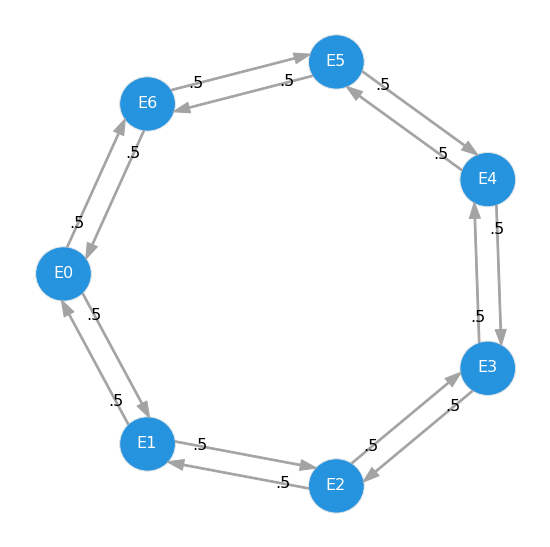

In [4]:
# Transition matrix
M = 1/2*np.array([
    [0, 1, 0, 0, 0, 0, 1], 
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0], 
])

mc = MarkovChain(M, ['E'+str(i) for i in range(N)])
mc.build_network()
mc.draw()

In [5]:
I = np.identity(N)
det = np.linalg.det(I - M)
print('Determinant:',det)

Determinant: 2.428612866367531e-17


And, of course, the mouse can also happily keep its random never-ending live

# Cases of "linear" layouts with absorbing hole (cat) at position k

## Cat hunting in the mouse hole 0

As an starter, let's assume that the Cat decides to hunt at hole 0

[[1.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  1.  0. ]]


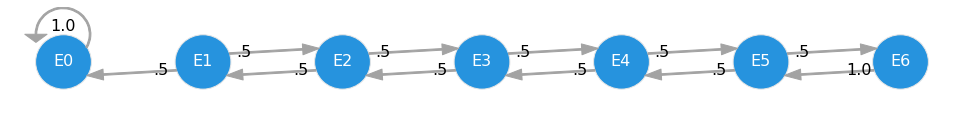

In [6]:
# Transition matrix
M = 1/2*np.array([
    [2, 0, 0, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 0, 0, 0, 2, 0], 
])
    
print(M)    
mc = MarkovChain(M, ['E'+str(i) for i in range(N)])
mc.build_network(pos='linear')
mc.draw()

A a standard procedure, we solve the problem by "removing" the absorbing hole from the problem matrix and solving the system of equations

In [7]:
# Delete "absorbing" hole (E0)
M = np.delete(M,0,0) # delete first row
M = np.delete(M,0,1) # delete first column
# M = np.delete(M,-1,0) # delete last row
# M = np.delete(M,-1,1) # delete last column

Transition Matrix ($E_0 = 0$)
$$
  M_{6\times6} =
  \left[ {\begin{array}{ccccc}
    0 & ½ &   &   &   &   \\
    ½ & 0 & ½ &   &   &   \\
      & ½ & 0 & ½ &   &   \\
      &   & ½ & 0 & ½ &   \\
      &   &   & ½ & 0 & ½ \\
      &   &   &   & 1 & 0 \\
  \end{array} } \right]
$$
$$(I-M)·
\begin{bmatrix} E_1 \\ E_2 \\ \vdots \\ E_5 \\ \end{bmatrix} = 
\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} $$

In [8]:
I = np.identity(N-1)
QE = np.linalg.inv(I - M)
E = np.matmul(QE,np.ones(N-1))
print(E,'μ =',E.mean()*(N-1)/N)

[11. 20. 27. 32. 35. 36.] μ = 23.0


## Cases of "linear" layouts with absorbing hole (cat) at position k

So, in general, we can start from the initial transition matrix and transform it in each case according to the position we assume for the absorbing node (cat)

In [9]:
# Transition matrix
M = 1/2*np.array([
    [0, 2, 0, 0, 0, 0, 0], 
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 0, 0, 0, 2, 0], 
])

for k in range(N):
    # Delete "absorbing" hole (Ek)
    Mk = M
    Mk = np.delete(Mk,k,0) # delete k-row 
    Mk = np.delete(Mk,k,1) # delete k-column

    I = np.identity(N-1)
    QE = np.linalg.inv(I - Mk)
    E = np.matmul(QE,np.ones(N-1))
    print(k,E,'μ =',E.mean()*(N-1)/N)

0 [11. 20. 27. 32. 35. 36.] μ = 23.0
1 [ 1.  9. 16. 21. 24. 25.] μ = 13.714285714285712
2 [ 4.  3.  7. 12. 15. 16.] μ = 8.14285714285714
3 [9. 8. 5. 5. 8. 9.] μ = 6.285714285714286
4 [16. 15. 12.  7.  3.  4.] μ = 8.142857142857142
5 [25. 24. 21. 16.  9.  1.] μ = 13.714285714285714
6 [36. 35. 32. 27. 20. 11.] μ = 23.0


So, we can see that there is a huge difference based on the choice the cat makes

## Cases of "circular" layouts with absorbing hole (cat) at position k
As we are curious people, we could also try to find out how the problem would be in case of a "circular" layout

In [10]:
# Transition matrix
M = 1/2*np.array([
    [0, 1, 0, 0, 0, 0, 1], 
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [1, 0, 0, 0, 0, 1, 0], 
])

for k in range(N):
    # Delete "absorbing" hole (Ek)
    Mk = M
    Mk = np.delete(Mk,k,0) # delete k-row 
    Mk = np.delete(Mk,k,1) # delete k-column

    I = np.identity(N-1)
    QE = np.linalg.inv(I - Mk)
    E = np.matmul(QE,np.ones(N-1))
    print(k,E,'μ =',E.mean()*(N-1)/N)

0 [ 6. 10. 12. 12. 10.  6.] μ = 7.999999999999999
1 [ 6.  6. 10. 12. 12. 10.] μ = 8.0
2 [10.  6.  6. 10. 12. 12.] μ = 7.999999999999998
3 [12. 10.  6.  6. 10. 12.] μ = 7.999999999999998
4 [12. 12. 10.  6.  6. 10.] μ = 7.999999999999998
5 [10. 12. 12. 10.  6.  6.] μ = 7.999999999999998
6 [ 6. 10. 12. 12. 10.  6.] μ = 7.999999999999999


And obviously in this case there is no difference due to the cat's location decision. 

Conclusion that we could have reached by simply taking into consideration the symmetry configuration of the problem without having to do any calculations.